# Taking Observations

### Wave propagation 

In [1]:
import os
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

In [2]:
from medis.medis_main import RunMedis  # this is the top level function
from medis.plot_tools import quick2D, grid  # plotting single images or a grid of images
from medis.params import ap,tp,atmp,iop,sp,mp  # this is where all the default parameters are stored
from medis.utils import dprint  # this is just a useful function

Overwrite the parameters we care about

In [3]:
# Companion
ap.companion = False
#ap.contrast = [1e-5]
ap.companion_xy = []  # units of this are in lambda/tp.entrance_d
ap.n_wvl_init = 1


sp.numframes = 1
sp.focused_sys = False
sp.beam_ratio = 0.3  # parameter dealing with the sampling of the beam in the pupil/focal plane
sp.grid_size = 256  # creates a nxn array of samples of the wavefront
sp.maskd_size = 256  # will truncate grid_size to this range (avoids FFT artifacts) # set to grid_size if undesired
sp.closed_loop = False

# Toggles for Aberrations and Control
tp.entrance_d = 5
tp.fnum_primary = 12
tp.flen_primary = tp.entrance_d*tp.fnum_primary
tp.dist_primary = tp.flen_primary + 1
tp.obscure = False
tp.use_atmos = True
tp.use_ao = False
tp.ao_act = 60
tp.rotate_atmos = False
tp.rotate_sky = False
tp.occult_loc = [0,0]

# Saving
tp.prescription = 'shashank_telescope'
sp.save_to_disk = False  # save obs_sequence (timestep, wavelength, x, y)
sp.save_list = ['detector']  # list of locations in optics train to save
# sp.skip_planes = ['coronagraph']  # ['wfs', 'deformable mirror']  # list of locations in optics train to save
sp.quick_detect = True
sp.debug = False
sp.verbose = True
tp.use_aber= True
tp.add_zern = False

ap.n_wvl_init = 3

# todo convert parameterss defined here to their own prescription params class
tp.lens_params = [{'aber_vals': [5e-18, 2.0, 3.1], 'diam': tp.entrance_d,  'focal_length': tp.flen_primary, 'dist' : tp.dist_primary, 'name': 'CPA'},
                  {'aber_vals': [5e-18, 2.0, 3.1], 'diam': tp.entrance_d, 'focal_length': tp.flen_primary, 'dist': tp.dist_primary, 'name': 'NCPA'}]


TESTDIR = 'demo'

First lets just intialise a simulation that generates ideal electric fields (no photon noise or dead pixels etc) for this system. This will create the top "test" directory if it does not already exist. If it does exist the params file will be checked against the requested parameters to see if they match (has not been fully verified yet)

In [4]:
sim = RunMedis(name=f'{TESTDIR}/justfields', product='fields')


	 Astro_params
{'C_spec': 1.5,
 'companion': False,
 'companion_xy': [],
 'contrast': [],
 'interp_wvl': True,
 'n_wvl_final': None,
 'n_wvl_init': 3,
 'spectra': [None, None],
 'star_flux': 100000,
 'wvl_range': array([8.0e-07, 1.5e-06])}

	 Telescope_params
{'abertime': 0.5,
 'add_zern': False,
 'ao_act': 60,
 'cg_size': 3,
 'cg_size_units': 'l/D',
 'cg_type': 'Gaussian',
 'dist_primary': 61,
 'entrance_d': 5,
 'fit_dm': True,
 'fl_cg_lens': 1000,
 'flen_primary': 60,
 'fnum_primary': 12,
 'legs_frac': 0.03,
 'lens_params': [{'aber_vals': [5e-18, 2.0, 3.1],
                  'diam': 5,
                  'dist': 61,
                  'focal_length': 60,
                  'name': 'CPA'},
                 {'aber_vals': [5e-18, 2.0, 3.1],
                  'diam': 5,
                  'dist': 61,
                  'focal_length': 60,
                  'name': 'NCPA'}],
 'lyot_size': 0.75,
 'obscure': False,
 'occult_loc': [0, 0],
 'piston_error': False,
 'pix_shift': [0, 0],
 'prescript

Calling sim will begin the observation that generates the fields ndarray. It will create all the directories, atmosphere maps, aberration maps, coronagraph maps and check if the simulation needs to be chunked to fit into the dynamic memory or not

since params['sp'].debug is True it will produce lots of plots

Using prescription /Users/shashank/MEDIS/simulations/shashank_telescope/shashank_telescope.py

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Atmosphere maps already exist at 
	/Users/shashank/MKIDSim/demo/justfields/atmos/gridsz256_bmratio0.3_tsteps1 
... skipping generation


Aberration maps already exist at 
	/Users/shashank/MKIDSim/demo/justfields/aberrations/gridsz256_bmratio0.3_tsteps1 
... skipping generation


Each timestep is predicted to be 0.786432 MB, meaning no more than 12715.0 time steps can fit in the memory at one time
File total size should be 0.786432 MB
Using time chunks of size 1
No mode specfified defaulting to markov (time independent)


	Beginning Telescope Simulation with MEDIS




/Users/shashank/anaconda3/envs/mirisim/lib/python3.6/site-packages/scipy/ndimage/interpolation.py:583: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


0.009900710699860624


2020-08-24 18:41:28,615 - INFO - Initializing Background
2020-08-24 18:41:28,617 - INFO - Initializing Point


INFO: Query finished. [astroquery.utils.tap.core]
         dist             solution_id     ... epoch_photometry_url
                                          ...                     
--------------------- ------------------- ... --------------------
0.0004245709664307645 1635721458409799680 ...                   --
5778.0
[0]


/Users/shashank/anaconda3/envs/mirisim/lib/python3.6/site-packages/astropy/convolution/convolve.py:92: ComplexWarning: Casting complex values to real discards the imaginary part
  output = np.array(input, dtype=dtype, copy=False, order=order, subok=True)


[1]
[2]
MEDIS/medis/optics.py:211 - saving plane at detector
Finished datacube at timestep = 0


	MEDIS Telescope Run Completed

Time elapsed: 0.40 minutes
Shape of cpx_sequence = timesteps:1, save planes:1, wavelengths:3, astronomical bodies:1, x:256, y:256


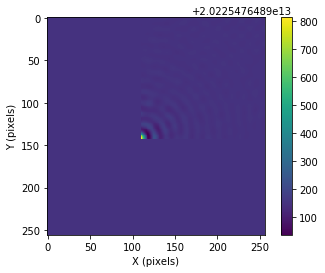

In [5]:
observation = sim()

This demonstration shows reflections in the focal plane at wide separation which woould be reduced with an increase in grid_size and decrease in beam_ratio if neccessary.

From this dictionary we can look at the fields ndarray before the convolution:

In [ ]:
print(observation.keys())
fields = observation['fields']
grid(np.angle(fields[0,0]), vlim=(-np.pi, np.pi), show=False, cmap='sunlight')
grid(fields[0,0], logZ=False, nstd=2, show=True)
print(np.max(fields[0,0]))

The sources image that is convolved using the kernel above:

In [ ]:
%matplotlib notebook
hdulist = fits.open("/Users/shashank/AnacondaProjects/MKIDsim/shashank_example_scene.fits")
hdulist[0].data.shape
hdulist[0].header
timeslice = 0
hdulist[0].data = np.nan_to_num(hdulist[0].data)
plt.imshow(hdulist[0].data[timeslice])
plt.xlabel("X (pixels)")
plt.ylabel("Y (pixels)")
print(np.max(hdulist[0].data[timeslice]))
plt.colorbar()

And after the convolution:

In [6]:
%matplotlib inline
print(observation.keys())
fields = observation['fields']
grid(np.angle(fields[0,1]), vlim=(-np.pi, np.pi), show=True, cmap='sunlight')
grid(fields[0,1], logZ=True, nstd=2, show=True)

dict_keys(['fields', 'sampling'])


IndexError: index 1 is out of bounds for axis 1 with size 1

In [ ]:
plt.imshow(np.real(fields[0,1,0,0]*np.conj(fields[0,1,0,0])))
plt.colorbar()
plt.xlabel("X (pixels)")
plt.ylabel("Y (pixels)")

In [ ]:
from astropy.convolution import convolve
test_arr = convolve(hdulist[0].data[timeslice],fields[0,0,0,0][:-1,:-1],boundary='extend',normalize_kernel=True)
plt.imshow(np.real(test_arr*np.conj(test_arr)))
plt.colorbar()
plt.xlabel("X (pixels)")
plt.ylabel("Y (pixels)")

### Quantization

Now lets repeat the process but use the product == 'photons' option for RunMedis 

In [ ]:
sp.debug = False  # we already know what the planes look like now
sp.save_to_disk = True  # save fields and save photons so they can be loaded
ap.star_flux = 1e9  # lets assume 1e9 photons across the array per second
mp.platescale = 10 *1e-3 # 10mas/pix
mp.array_size = np.array([100,100])  # this will take the center 100*10mas of the input image
sp.numframes = 20 # 20 * 0.5 ms = 10 ms of photon data
sim = RunMedis( name=f'{TESTDIR}/photonlist', product='rebinned_cube')

This will create a new folder with a new fields ndarray (this time with more timesteps) and generate photons from it

In [ ]:
observation = sim()

The simulation produced 100000 photons with 20 time samples, 1 wavelength sample on a 100 by 100 array

observation['stackcube'] is already in nice format for viewing. Lets plot every 5th timestep

In [ ]:
grid(observation['rebinned_cube'], show=True, title='Rebinned photon data')